In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import confusion_matrix

In [2]:
from sklearn.datasets import load_iris
dataset = load_iris()
dir(dataset)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [3]:
dataset['DESCR']

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n:Number of Instances: 150 (50 in each of three classes)\n:Number of Attributes: 4 numeric, predictive attributes and the class\n:Attribute Information:\n    - sepal length in cm\n    - sepal width in cm\n    - petal length in cm\n    - petal width in cm\n    - class:\n            - Iris-Setosa\n            - Iris-Versicolour\n            - Iris-Virginica\n\n:Summary Statistics:\n\n============== ==== ==== ======= ===== ====================\n                Min  Max   Mean    SD   Class Correlation\n============== ==== ==== ======= ===== ====================\nsepal length:   4.3  7.9   5.84   0.83    0.7826\nsepal width:    2.0  4.4   3.05   0.43   -0.4194\npetal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\npetal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n============== ==== ==== ======= ===== ====================\n\n:Missing Attribute Values: None\n:Class Distribution: 

In [4]:
dataset['data'][0]

array([5.1, 3.5, 1.4, 0.2])

In [5]:
dataset['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
set(dataset['target'])

{np.int64(0), np.int64(1), np.int64(2)}

In [7]:
dataset['target_names'] # target classes (multi class classification)

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
x_train, x_test, y_train, y_test = train_test_split(dataset['data'], dataset['target'], test_size=0.2, random_state=42)
len(x_train), len(x_test), len(y_train), len(y_test)

(120, 30, 120, 30)

In [9]:
reg = linear_model.LogisticRegression()
reg

LogisticRegression()

In [10]:
reg.fit(x_train, y_train)
reg

LogisticRegression()

In [11]:
print(f"Model training score: {reg.score(x_train, y_train)}")

Model training score: 0.975


In [12]:
y_pred = reg.predict(x_test)
print(f"Model test score: {reg.score(x_test, y_test)}")

Model test score: 1.0


In [13]:
# predict_probabilities
reg.predict_proba(x_test)

array([[3.80003288e-03, 8.27709981e-01, 1.68489986e-01],
       [9.46943486e-01, 5.30563152e-02, 1.99071285e-07],
       [8.84349819e-09, 1.54870684e-03, 9.98451284e-01],
       [6.47949015e-03, 7.92188507e-01, 2.01332003e-01],
       [1.45577986e-03, 7.74084104e-01, 2.24460116e-01],
       [9.55892185e-01, 4.41076391e-02, 1.76235335e-07],
       [7.79791320e-02, 9.07731473e-01, 1.42893952e-02],
       [1.63591798e-04, 1.54519983e-01, 8.45316426e-01],
       [2.22240689e-03, 7.62830469e-01, 2.34947124e-01],
       [2.84233804e-02, 9.45743229e-01, 2.58333903e-02],
       [4.44794396e-04, 2.42507261e-01, 7.57047944e-01],
       [9.68133252e-01, 3.18666701e-02, 7.79944284e-08],
       [9.72999514e-01, 2.70004524e-02, 3.32217643e-08],
       [9.61911999e-01, 3.80878907e-02, 1.10772045e-07],
       [9.79281013e-01, 2.07189228e-02, 6.45322423e-08],
       [4.58881774e-03, 7.12303786e-01, 2.83107396e-01],
       [7.30557168e-06, 2.41351550e-02, 9.75857539e-01],
       [2.73509086e-02, 9.47771

In [14]:
cm = confusion_matrix(y_test, y_pred)

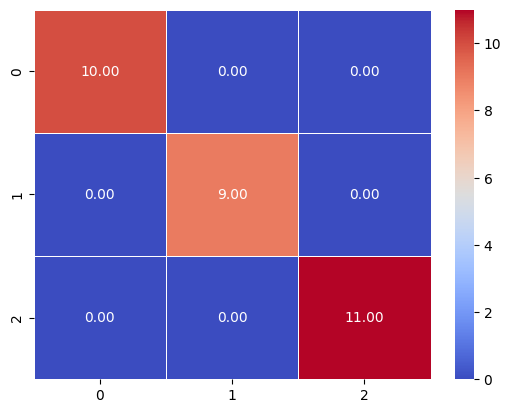

In [15]:
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()

In [16]:
import pickle

In [17]:
with open("multiclassmodel", "wb") as f:
    pickle.dump(reg, f)

In [18]:
with open("multiclassmodel", "rb") as f:
    model = pickle.load(f)

In [19]:
print(f"Model test score: {model.score(x_test, y_test)}")

Model test score: 1.0
